# A. PYGAME

1. PENGERTIAN PYGAME
   * Pygame adalah seperangkat modul Python yang dirancang untuk membuat permainan. Pygame menambahkan fungsi di atas dengan sangat baik di SDL perpustakaan. Hal ini memungkinkan Anda untuk membuat sebuah game dengan fitur yang lengkap dan sebuah program multimedia dalam bahasa python. Pygame sangat portabel dan dapat berjalan pada hampir semua platform dan sistem operasi. 
   
2. MENGINSTAL PYGAME
   * Download aplikasi python pada laman https://www.python.org/downloads/
   * install file python pada laptop.
   * Download aplikasi pycharm pada laman https://www.jetbrains.com/pycharm/download/#section=windows
   * install file pycharm pada laptop.
   * Dari langkah ini, barulah kita menginstal pygame.
   * Buka pycharm dan buka file, lalu pilih settings.
   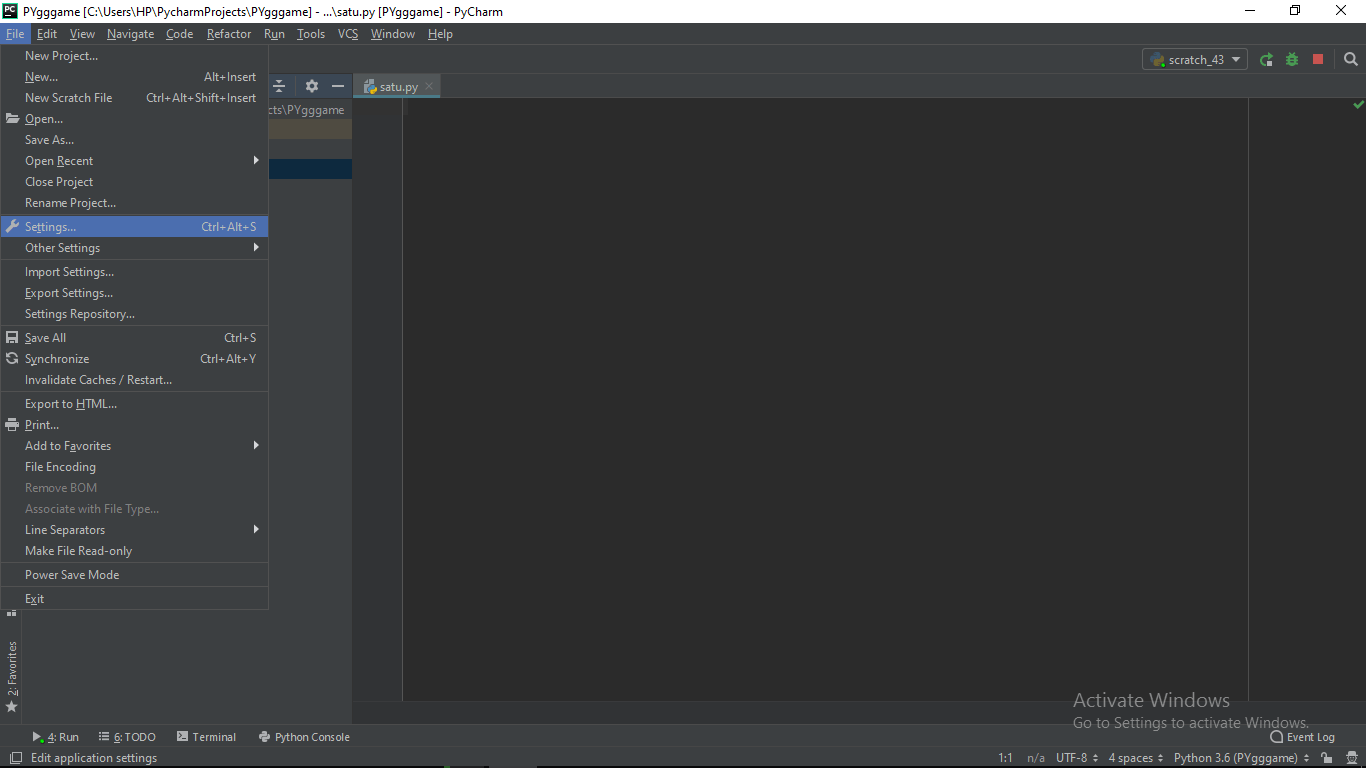
   
   * Pilih project interpreter lalu tambah/install (alt+insert), cari pygame dan install package tunggu hingga installed succesfully.
   
   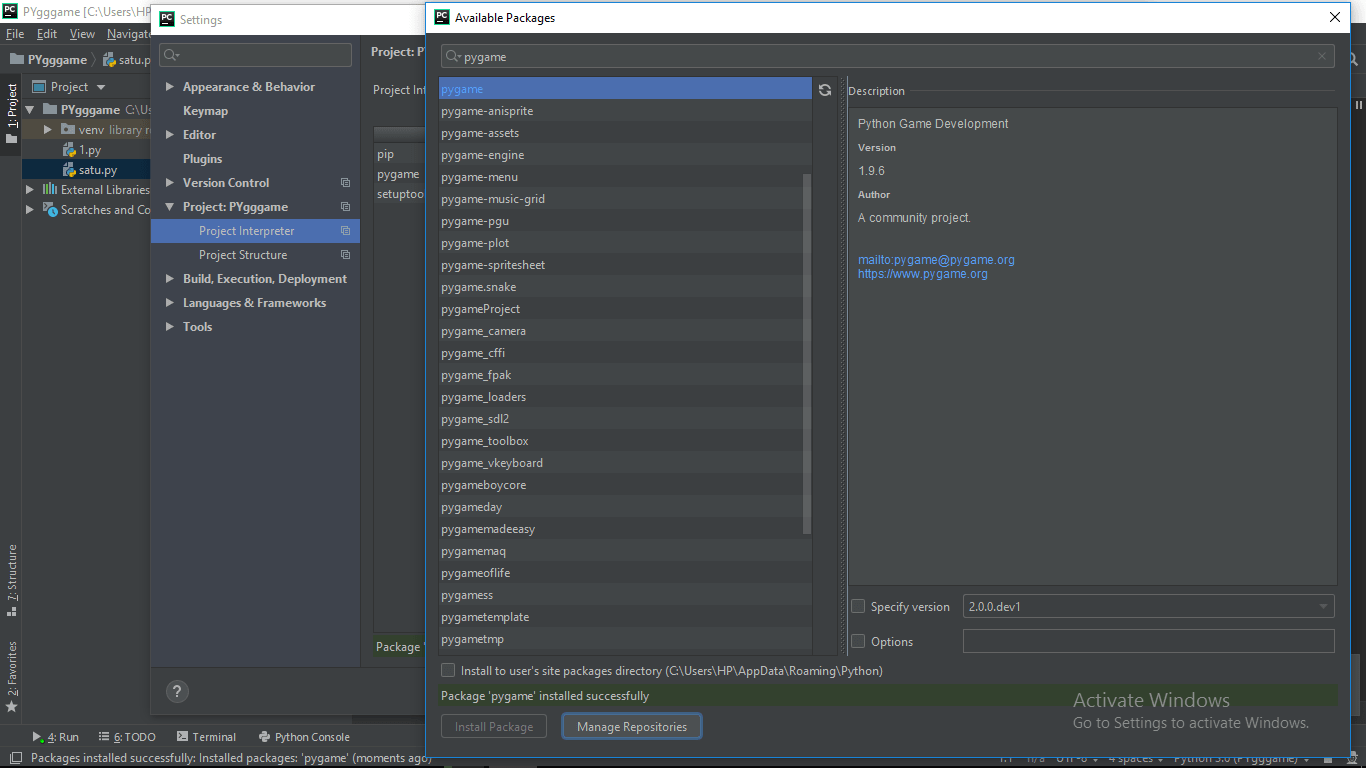
   * Pygame telah selesai diinstall pada pycharm.
   
3. CODE PROJECT PYGAME
   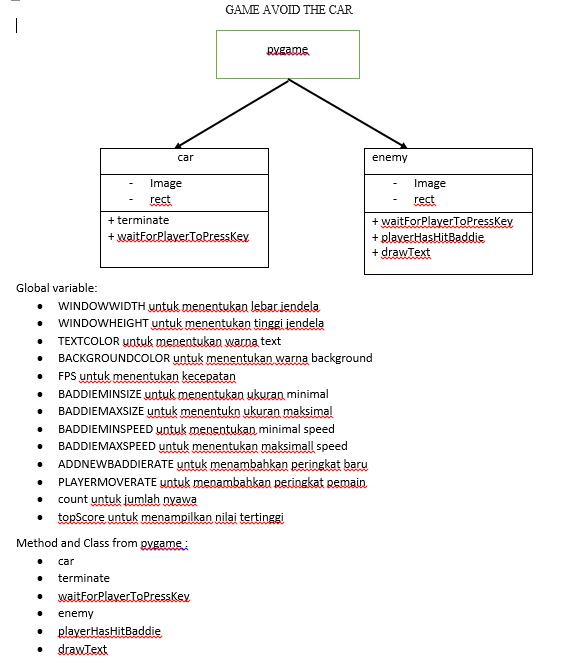

    - import pygame, random, sys, os, time
    - from pygame.locals import *

    - WINDOWWIDTH = 800
    - WINDOWHEIGHT = 600
    - TEXTCOLOR = (255, 255, 255)
    - BACKGROUNDCOLOR = (0, 0, 0)
    - FPS = 40
    - BADDIEMINSIZE = 10
    - BADDIEMAXSIZE = 40
    - BADDIEMINSPEED = 8
    - BADDIEMAXSPEED = 8
    - ADDNEWBADDIERATE = 6
    - PLAYERMOVERATE = 5
    - count = 3
    - topScore=0


class car(object):
    def terminate(self):
        pygame.quit()
        sys.exit()
    def waitForPlayerToPressKey(self):
        while True:
            for event in pygame.event.get():
                if event.type == QUIT:
                    terminate()
                if event.type == KEYDOWN:
                    if event.key == K_ESCAPE:  # escape quits
                        terminate()
                    return


class enemy(object):
    def waitForPlayerToPressKey(self):
        while True:
            for event in pygame.event.get():
                if event.type == QUIT:
                    pygame.quit()
                    sys.exit()
                if event.type == KEYDOWN:
                    if event.key == K_ESCAPE:  # escape quits
                        pygame.quit()
                        sys.exit()
                    return

    def playerHasHitBaddie(playerRect, baddies):
        for b in baddies:
            if playerRect.colliderect(b['rect']):
                return True
        return False

    def drawText(text, font, surface, x, y):
        textobj = font.render(text, 1, TEXTCOLOR)
        textrect = textobj.get_rect()
        textrect.topleft = (x, y)
        surface.blit(textobj, textrect)

    pygame.init()
    mainClock = pygame.time.Clock()
    windowSurface = pygame.display.set_mode((WINDOWWIDTH, WINDOWHEIGHT))
    pygame.display.set_caption('car race')
    pygame.mouse.set_visible(False)

    playerImage = pygame.image.load('car1.png')
    car3 = pygame.image.load('car3.png')
    car4 = pygame.image.load('car4.png')
    playerRect = playerImage.get_rect()
    baddieImage = pygame.image.load('car2.png')
    sample = [car3, car4, baddieImage]
    wallLeft = pygame.image.load('left.png')
    wallRight = pygame.image.load('right.png')

    font = pygame.font.SysFont(None, 42)
    drawText('PRESS ANY KEY TO START THE GAME!', font, windowSurface, (WINDOWWIDTH / 3) - 137, (WINDOWHEIGHT / 3) + 80)
    pygame.display.update()
    waitForPlayerToPressKey(self=0)
    zero = 0

    while (count > 0):
        baddies = []
        score = 0
        playerRect.topleft = (WINDOWWIDTH / 2, WINDOWHEIGHT - 50)
        moveLeft = moveRight = moveUp = moveDown = False
        reverseCheat = slowCheat = False
        baddieAddCounter = 0

        while True:
            score += 1

            for event in pygame.event.get():

                if event.type == QUIT:
                    pygame.quit()
                    sys.exit()

                if event.type == KEYDOWN:
                    if event.key == ord('z'):
                        reverseCheat = True
                    if event.key == ord('x'):
                        slowCheat = True
                    if event.key == K_LEFT or event.key == ord('a'):
                        moveRight = False
                        moveLeft = True
                    if event.key == K_RIGHT or event.key == ord('d'):
                        moveLeft = False
                        moveRight = True
                    if event.key == K_UP or event.key == ord('w'):
                        moveDown = False
                        moveUp = True
                    if event.key == K_DOWN or event.key == ord('s'):
                        moveUp = False
                        moveDown = True

                if event.type == KEYUP:
                    if event.key == ord('z'):
                        reverseCheat = False
                        score = 0
                    if event.key == ord('x'):
                        slowCheat = False
                        score = 0
                    if event.key == K_ESCAPE:
                        pygame.quit()
                        sys.exit()

                    if event.key == K_LEFT or event.key == ord('a'):
                        moveLeft = False
                    if event.key == K_RIGHT or event.key == ord('d'):
                        moveRight = False
                    if event.key == K_UP or event.key == ord('w'):
                        moveUp = False
                    if event.key == K_DOWN or event.key == ord('s'):
                        moveDown = False

            if not reverseCheat and not slowCheat:
                baddieAddCounter += 1
            if baddieAddCounter == ADDNEWBADDIERATE:
                baddieAddCounter = 0
                baddieSize = 30
                newBaddie = {'rect': pygame.Rect(random.randint(140, 485), 0 - baddieSize, 23, 47),
                             'speed': random.randint(BADDIEMINSPEED, BADDIEMAXSPEED),
                             'surface': pygame.transform.scale(random.choice(sample), (23, 47)),
                             }
                baddies.append(newBaddie)
                sideLeft = {'rect': pygame.Rect(0, 0, 126, 600),
                            'speed': random.randint(BADDIEMINSPEED, BADDIEMAXSPEED),
                            'surface': pygame.transform.scale(wallLeft, (126, 599)),
                            }
                baddies.append(sideLeft)
                sideRight = {'rect': pygame.Rect(497, 0, 303, 600),
                             'speed': random.randint(BADDIEMINSPEED, BADDIEMAXSPEED),
                             'surface': pygame.transform.scale(wallRight, (303, 599)),
                             }
                baddies.append(sideRight)

            if moveLeft and playerRect.left > 0:
                playerRect.move_ip(-1 * PLAYERMOVERATE, 0)
            if moveRight and playerRect.right < WINDOWWIDTH:
                playerRect.move_ip(PLAYERMOVERATE, 0)
            if moveUp and playerRect.top > 0:
                playerRect.move_ip(0, -1 * PLAYERMOVERATE)
            if moveDown and playerRect.bottom < WINDOWHEIGHT:
                playerRect.move_ip(0, PLAYERMOVERATE)

            for b in baddies:
                if not reverseCheat and not slowCheat:
                    b['rect'].move_ip(0, b['speed'])
                elif reverseCheat:
                    b['rect'].move_ip(0, -5)
                elif slowCheat:
                    b['rect'].move_ip(0, 1)

            for b in baddies[:]:
                if b['rect'].top > WINDOWHEIGHT:
                    baddies.remove(b)

            font = pygame.font.SysFont(None, 38)
            windowSurface.fill(BACKGROUNDCOLOR)
            drawText('Score: %s' % (score), font, windowSurface, 128, 0)
            drawText('Top Score: %s' % (topScore), font, windowSurface, 128, 21)
            drawText('Rest Life: %s' % (count), font, windowSurface, 128, 41)

            windowSurface.blit(playerImage, playerRect)

            for b in baddies:
                windowSurface.blit(b['surface'], b['rect'])

            pygame.display.update()

            if playerHasHitBaddie(playerRect, baddies):
                if score > topScore:
                    topScore = score
                break

            mainClock.tick(FPS)

        count = count - 1
        time.sleep(1)
        font = pygame.font.SysFont(None, 52)
        if (count == 0):
            drawText('Game Over', font, windowSurface, (WINDOWWIDTH / 3) + 40, (WINDOWHEIGHT / 3) + 70)
            drawText('Press any key to play again.', font, windowSurface, (WINDOWWIDTH / 3) - 110,
                     (WINDOWHEIGHT / 3) + 95)
            pygame.display.update()
            time.sleep(3)
            waitForPlayerToPressKey(self=0)
            count = 3
   
4. HASIL PROGRAM PYGAME
   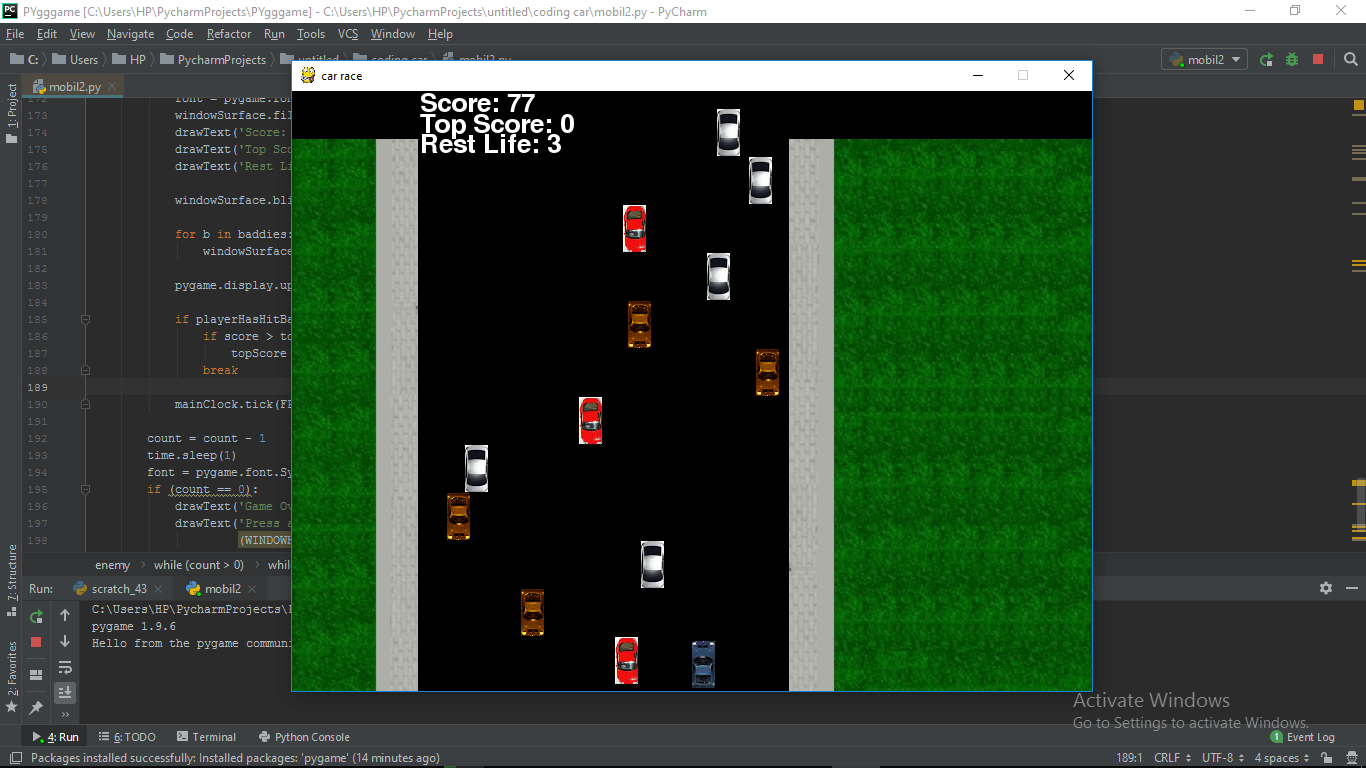
   
5. STRUKTUR CLASS PYGAME
   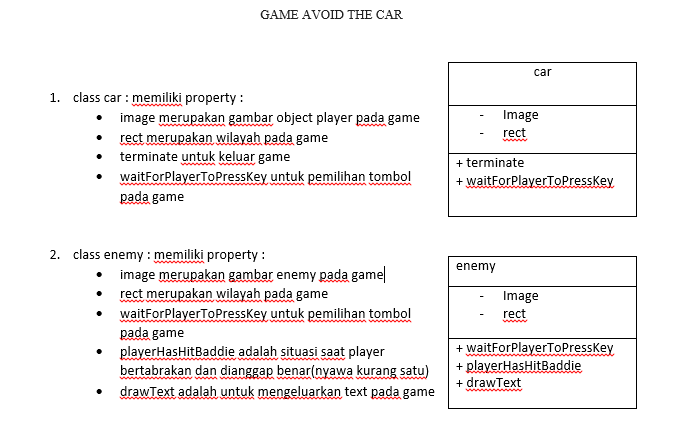
   
6. IMPLEMENTASI MATERI OOP PADA PROJECT PYGAME
   * Class merupakan template(cetakan) yang digunakan untuk mendefinisikan objek secara umum. 
   * Method merupakan suatu bagian dari class yang digunakan untuk mendefiniskan, menampilkan, mengolah objek atau method harus memiliki parameter self agar bisa dipanggil.
   * Inheritance adalah pewarisan atau turunan.
   * Jadi, pada project pygame avoid the car memiliki 2 class induk, yaitu:
       * Class car(object) dengan method sebagai berikut : terminate dan waitForPlayerToPressKey
       * Class enemy(object) dengan method sebgai berikut : waitForPlayerToPressKey, playerHasHitBaddie, drawText.
   * Pada project ini menggunakan inheritance super() karena menggunakan pemanggilan method. seperti perulangan while yang memanggil method waitForPlayerToPressKey.


# B. KIVY

1. PENGERTIAN KIVY
   * Kivy adalah pustaka Python sumber terbuka dan gratis untuk mengembangkan aplikasi seluler dan perangkat lunak aplikasi multitouch lainnya dengan antarmuka pengguna alami. Ini didistribusikan di bawah ketentuan Lisensi MIT, dan dapat berjalan di Android, iOS, Linux, OS X, dan Windows.
   * Kivy ini sendiri merupakan framework yang dibangun menggunakan library dari bahasa pemrograman Python yang bersifat Open Source. Tujuan dikembangkannya framework ini agar dapat membantu developer secara cepat dalam mengembangkan aplikasi yang memiliki tampilan antarmuka inovatif seperti aplikasi yang mendukung multitouch.
   
2. MENGINSTALL KIVY
   * Menginstal pada command promt, Dengan perintah sebagai berikut:
   * Pastikan Anda memiliki pip dan wheel :   
           * python -m pip install --upgrade pip wheel setuptools
   * Instal dependensi : 
           * python -m pip install docutils pygments pypiwin32 kivy.deps.sdl2 kivy.deps.glew
           * python -m pip install kivy.deps.gstreamer
   * #Note : Jika Anda menemukan MemoryError saat menginstal, tambahkan setelah :   
           * pip instal opsi –no-cache-dir
   * lalu :   
           * python -m pip install kivy.deps.angle
   * Install kivy :  
           * python -m pip install kivy
   * Install contoh kivy :  
           * python -m pip install kivy_examples
   * Menginstall pada command promt sudah selesai, selanjutnya install package pada pycharm, tunggu hingga installed succesfully.
   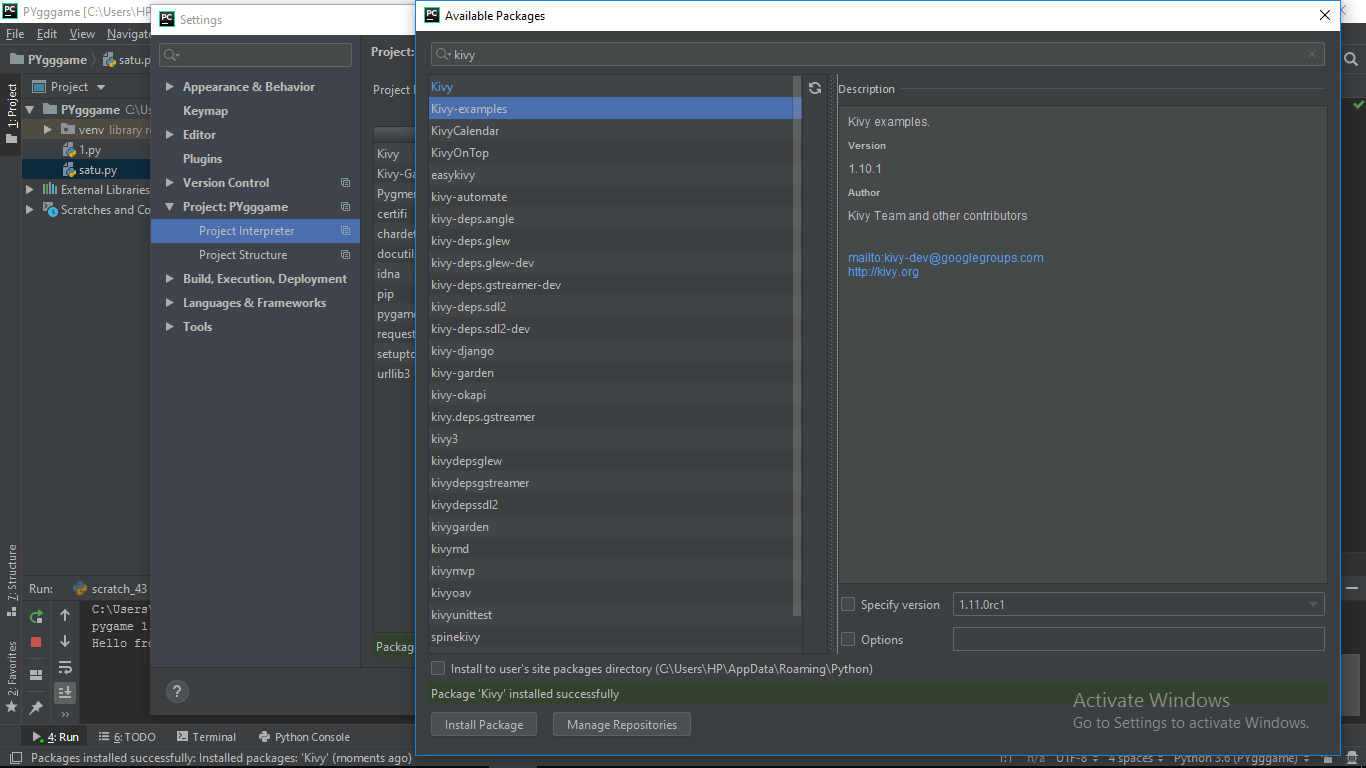
   * Instal semua avaible package kivy yang ada di pycharm.
   * Instalasi kivy telah selesai
   
3. CODE PROJECT KIVY
   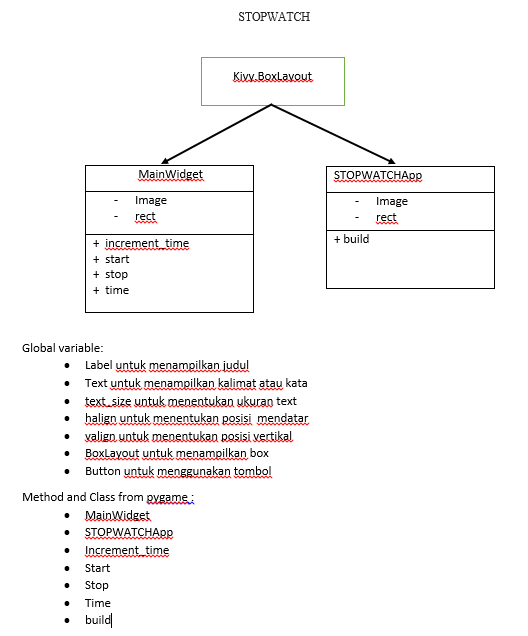

    - from kivy.app import App
    - from kivy.lang import Builder
    - from kivy.properties import NumericProperty
    - from kivy.uix.boxlayout import BoxLayout
    - from kivy.clock import Clock
    - from datetime import datetime


Builder.load_string('''
<MainWidget>:
    BoxLayout:
        Label :
            text:''
        Label:
            text:'Monday 27 May 2019'
        Label:
            text: str(root.number)
            text_size: self.size
            halign:'center'
            valign:'middle'

    BoxLayout:
        Button:
            text: 'Start'
            on_press: root.start()

        Button:
            text: 'Stop'
            on_press: root.stop()

        Button:
            text: 'Reset'
            on_press: root.number = 0

''')


class MainWidget(BoxLayout):
    number = NumericProperty()

    def __init__(self, **kwargs):
        super(MainWidget, self).__init__(**kwargs)
        Clock.schedule_interval(self.increment_time, 1)
        self.increment_time(0)

    def increment_time(self, interval):
        self.number += 1

    def start(self):
        Clock.unschedule(self.increment_time)
        Clock.schedule_interval(self.increment_time, 1)

    def stop(self):
        Clock.unschedule(self.increment_time)

    def time(self):
        datetime.now()


class STOPWATCHApp(App):
    def build(self):
        return MainWidget()


STOPWATCHApp().run()

4. HASIL PROGRAM KIVY
   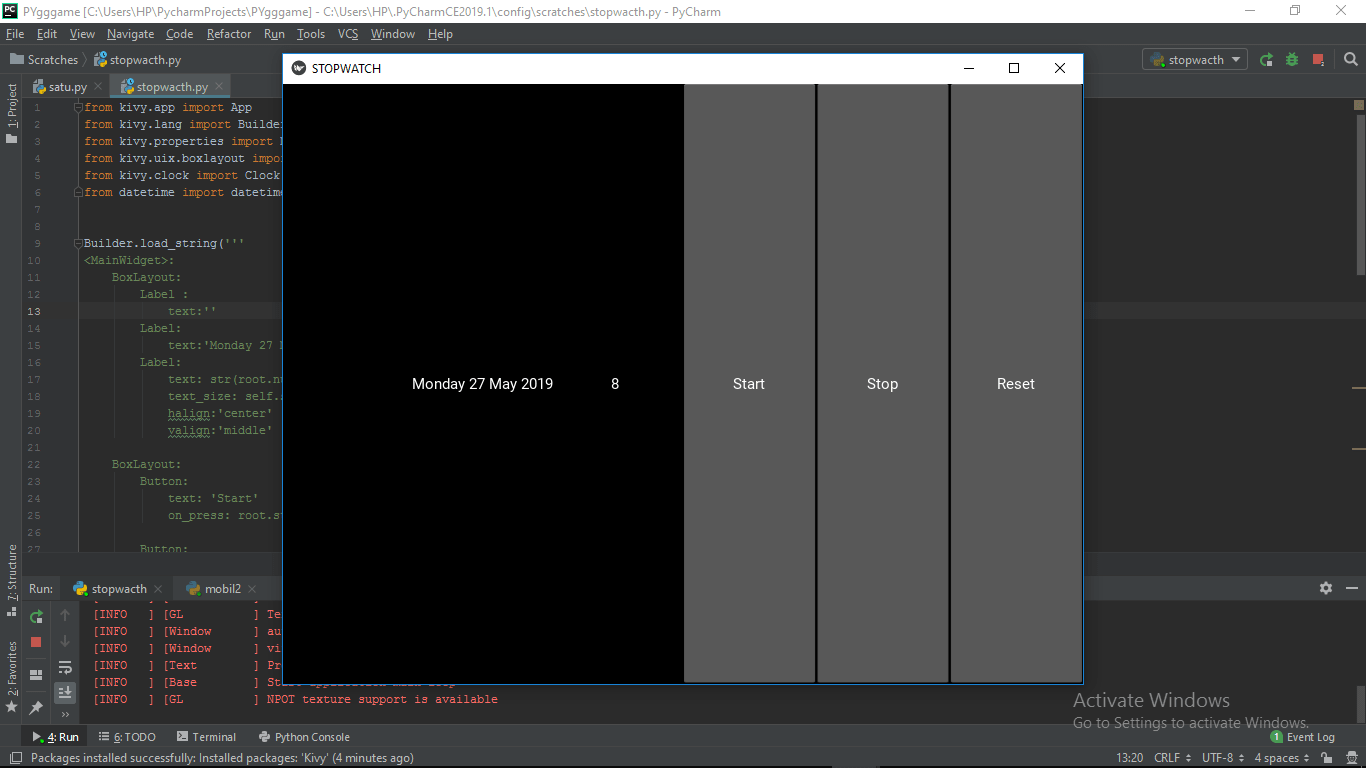
   
5. STRUKTUR CLASS KIVY
   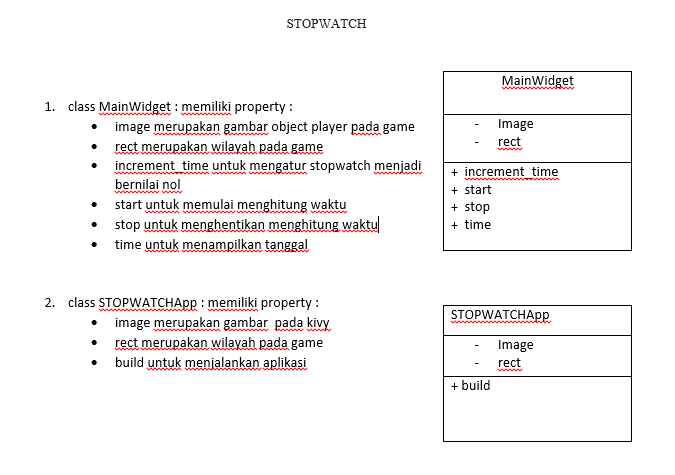
6. IMPLEMENTASI MATERI OOP PADA PROJECT KIVY
   * Class merupakan template(cetakan) yang digunakan untuk mendefinisikan objek secara umum. 
   * Method merupakan suatu bagian dari class yang digunakan untuk mendefiniskan, menampilkan, mengolah objek atau method harus memiliki parameter self agar bisa dipanggil.
   * jadi, pada project kivy stopwatch memiliki 2 class induk dan beberapa method yaitu 
       * Class MainWidget(BoxLayout): increment_time, start, stop, dan time. 
       * Class STOPWATCHApp(App) hanya memiliki satu method yaitu build.
